<img src="mrc.png" alt="Description de l'image" width="1400" height="100">

## <span style="color: red;">Chilhood Tuberculosis Study</span>

### <span style="color: red;">Data Exploration and Descriptive Statistics</span>

### <span style="color: red;"> I. Data Exploration</span>

# I. Data Exploration
1. Data Loading and Overview
2. Missing Values
3. Variable Classification and Typing

# II. Descriptive Statistics
1. Continuous Variable Analysis
2. Categorical Variable Analysis
3. Bivariate Descriptive Analysis
4. Visual Synthesis and Correlation
5. Summary Observations


#### <span style="color: red;">Load Packages</span>

#### Commit for any modification
**git add 'file path/file name'**

**git commit -m 'clean step'**

#### Push at the end of the sep
**git push**

In [3]:
#import sys
#print(sys.executable)
#!c:\Users\asani\AppData\Local\Programs\Python\Python313\python.exe -m pip install plotnine

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches    
import seaborn as sns  
import geopandas as gpd
import missingno as msn   
import janitor
import re       
from dateutil import parser 

#### <span style="color: red;"> Load the dataset and initial overview</span>

In [4]:
# Load the dataset
df = pd.read_csv('cleaned_tb_dataset.csv')

# Display the first few rows of the dataset
display(df.head())

# Display the shape of the dataset
print(df.shape)

,patient_id,date_particip,gender,cough,productive,chest_pain,wheeze,fever_chills,weight_loss_or_no_gain,difficulty_breathing,...,data_when_positive,time_when_positive,histology_result,hiv_serology,diagnosis,eptb_site,other_diagnosis,tb_treatment_ref,age,country
0,ben001,2020-05-05,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,...,NaN,NaN,4.0,0.0,3.0,no,pneumonia,0.0,0.67,Benin
1,ben003,2020-04-28,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,...,NaN,NaN,2.0,1.0,3.0,no_eptb,lymphoma,0.0,14.00,Benin
2,ben004,2020-04-30,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,NaN,NaN,4.0,0.0,3.0,an_acute_community_pneumonia,NaN,0.0,14.00,Benin
3,ben005,2020-05-06,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,4.0,1.0,3.0,NaN,pneumocystis,0.0,2.42,Benin
4,ben0059,2021-03-18,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,NaN,NaN,4.0,2.0,3.0,not_an_eptb,other_pneumonia,0.0,5.00,Benin


(228, 64)


In [10]:
import pandas as pd

# Initialize summary dictionary
summary = {}

# Country distribution
country_counts = df['country'].value_counts(dropna=False)
country_percents = round(df['country'].value_counts(normalize=True, dropna=False) * 100, 1)
summary['Country'] = pd.DataFrame({'Count': country_counts, 'Percent': country_percents})

# Age: Median and IQR
age_median = df['age'].median()
age_q1 = df['age'].quantile(0.25)
age_q3 = df['age'].quantile(0.75)
summary['Age (Median, IQR)'] = f"{round(age_median,1)} ({round(age_q1,1)}–{round(age_q3,1)})"

# Number and % of children <5 years
under_5 = df[df['age'] < 5]
summary['<5 years'] = f"{len(under_5)} ({round(len(under_5)/len(df)*100, 1)}%)"

# Sex distribution
gender_counts = df['gender'].value_counts(dropna=False)
gender_percents = round(df['gender'].value_counts(normalize=True, dropna=False) * 100, 1)
summary['Sex'] = pd.DataFrame({'Count': gender_counts, 'Percent': gender_percents})

# HIV status distribution
hiv_counts = df['hiv_serology'].value_counts(dropna=False)
hiv_percents = round(df['hiv_serology'].value_counts(normalize=True, dropna=False) * 100, 1)
summary['HIV Status'] = pd.DataFrame({'Count': hiv_counts, 'Percent': hiv_percents})

# Clinical symptoms
for symptom in ['cough', 'fever_chills', 'lethargy']:
    if symptom in df.columns:
        counts = df[symptom].value_counts(dropna=False)
        percents = round(df[symptom].value_counts(normalize=True, dropna=False) * 100, 1)
        summary[symptom.replace('_', ' ').capitalize()] = pd.DataFrame({'Count': counts, 'Percent': percents})

# Past history of TB
if 'previous_tb' in df.columns:
    counts = df['previous_tb'].value_counts(dropna=False)
    percents = round(df['previous_tb'].value_counts(normalize=True, dropna=False) * 100, 1)
    summary['Past TB History'] = pd.DataFrame({'Count': counts, 'Percent': percents})

# Respiratory sample type
if 'specimen_type' in df.columns:
    sample_counts = df['specimen_type'].value_counts(dropna=False)
    sample_percents = round(df['specimen_type'].value_counts(normalize=True, dropna=False) * 100, 1)
    summary['Respiratory Sample Type'] = pd.DataFrame({'Count': sample_counts, 'Percent': sample_percents})

# Diagnosis
if 'diagnosis' in df.columns:
    diag_counts = df['diagnosis'].value_counts(dropna=False)
    diag_percents = round(df['diagnosis'].value_counts(normalize=True, dropna=False) * 100, 1)
    summary['Diagnosis'] = pd.DataFrame({'Count': diag_counts, 'Percent': diag_percents})

# Show results
display(summary)

{'Country':          Count  Percent
 country                
 Mali        70     30.7
 Benin       66     28.9
 Ghana       66     28.9
 Nigeria     26     11.4,
 'Age (Median, IQR)': '3.6 (1.0–8.0)',
 '<5 years': '131 (57.5%)',
 'Sex':         Count  Percent
 gender                
 2.0       119     52.2
 1.0       107     46.9
 NaN         2      0.9,
 'HIV Status':               Count  Percent
 hiv_serology                
 0.0             127     55.7
 3.0              49     21.5
 1.0              41     18.0
 2.0               8      3.5
 NaN               3      1.3,
 'Cough':        Count  Percent
 cough                
 0.0      115     50.4
 2.0       59     25.9
 1.0       52     22.8
 NaN        2      0.9,
 'Fever chills':               Count  Percent
 fever_chills                
 1.0             171     75.0
 0.0              53     23.2
 2.0               2      0.9
 NaN               2      0.9,
 'Lethargy':           Count  Percent
 lethargy                
 0.0     

In [11]:
df.columns

Index(['patient_id', 'date_particip', 'gender', 'cough', 'productive',
       'chest_pain', 'wheeze', 'fever_chills', 'weight_loss_or_no_gain',
       'difficulty_breathing', 'night_sweats', 'side_pain', 'malaise_fatigue',
       'loss_appetite', 'haemoptysis', 'vomiting', 'previous_tb',
       'date_previous_tb', 'pallor', 'splenomegaly', 'jaundice',
       'hepatomegaly', 'wasting', 'dyspnoea', 'lethargy',
       'abd_distension_mass', 'neck_lymph', 'temperature', 'weight', 'height',
       'middle_upper_arm_cir', 'other_clinical_sign', 'respiratory_rate',
       'subscostal_rec', 'dullness', 'crepitation', 'bronchial_breathing',
       'rhonchi', 'reduced_breath_sounds', 'other_abnorm', 'abnorm_site',
       'cxr_done', 'cxr_date', 'cxr_quality', 'assessment', 'q50_pre_tb',
       'other_x_ray', 'specimen_type', 'spec_date', 'sputum_type',
       'gx_mtb_result', 'gx_rif_resistance', 'mgit_result',
       'other_mycobactera', 'data_when_positive', 'time_when_positive',
       'histo

**The  dataset contains 228 rows, representing the number of observations, and  82  columns, representing the number of variables.**

#### <span style="color: red;">Missing data overview</span>

In [3]:
# Inspect Missing Values
missing_values = df.isnull().sum()
missing_proportions = missing_values / len(df )
missing_df = pd.concat([missing_values, missing_proportions], axis=1)

missing_df.columns = ['Number of Missing Values', 'Proportion of Missing Values']
missing_df = missing_df.sort_values('Proportion of Missing Values', ascending=False)

display(missing_df)

,Number of Missing Values,Proportion of Missing Values
other_mycobactera,224,0.982456
date_previous_tb,222,0.973684
other_abnorm,216,0.947368
abnorm_site,216,0.947368
data_when_positive,200,0.877193
...,...,...
reduced_breath_sounds,2,0.008772
rhonchi,2,0.008772
bronchial_breathing,2,0.008772
patient_id,0,0.000000



#### <span style="color: red;">Visualize missingness statistics</span>

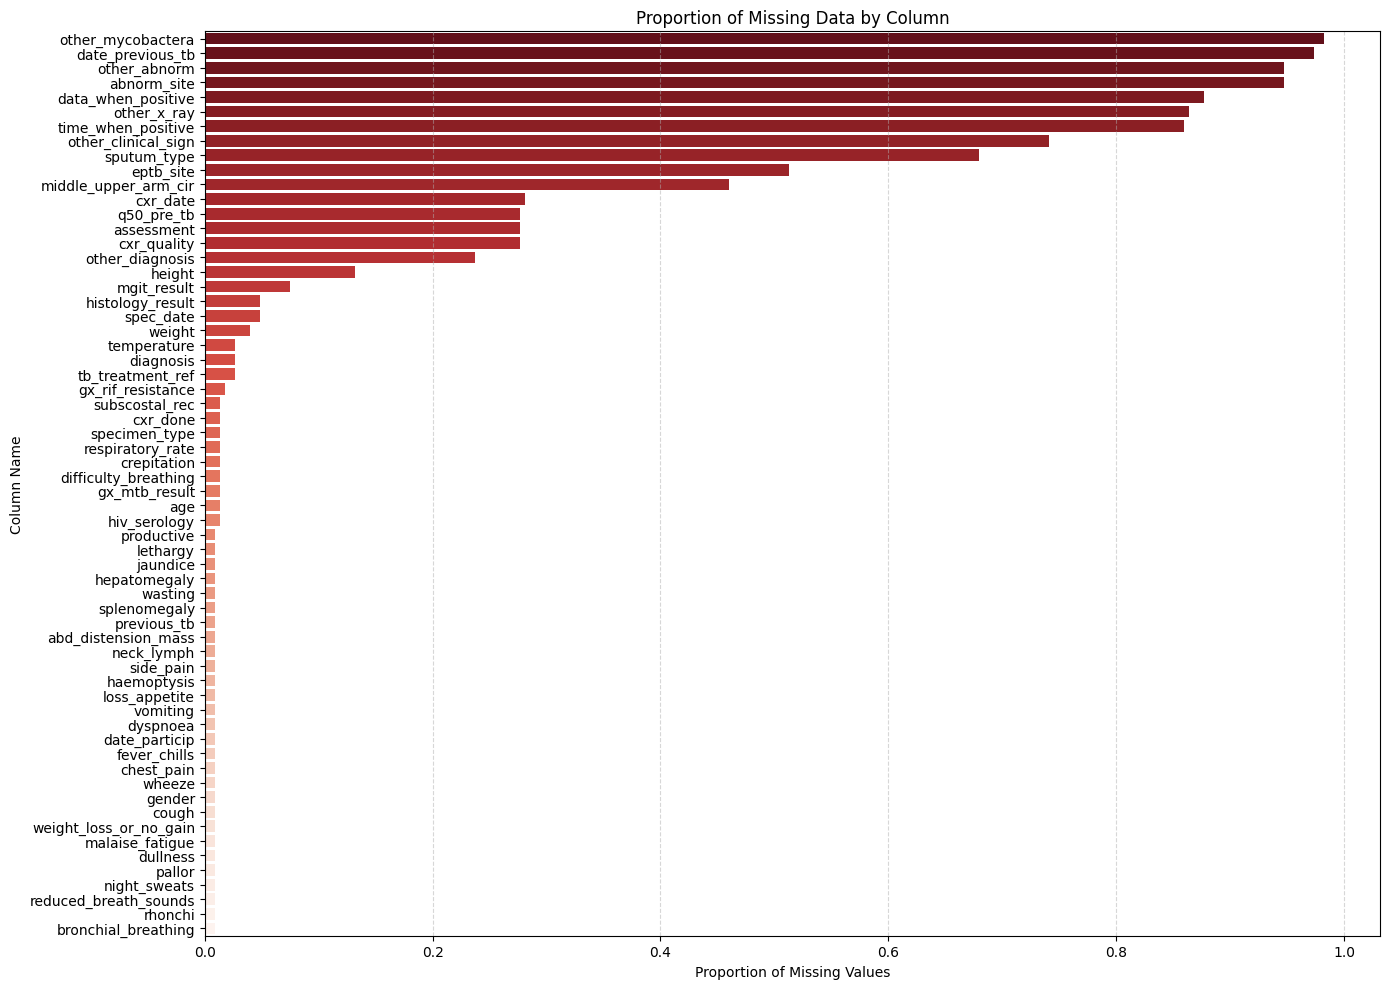

In [4]:
# Calculate missing values and proportions
missing_values = df.isnull().sum()
missing_proportions = missing_values / len(df)

# Combine into a single DataFrame
missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Missing Count', 'Missing Proportion']
missing_df = missing_df.sort_values('Missing Proportion', ascending=False)

# Filter to only show columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]

# Plot
plt.figure(figsize=(14, 10))
sns.barplot(
    data=missing_df.reset_index(),
    y='index',
    x='Missing Proportion',
    hue='index',             # Set hue to avoid FutureWarning
    palette='Reds_r',
    dodge=False,
    legend=False             # Hide legend (since hue is redundant here)
)
plt.xlabel('Proportion of Missing Values')
plt.ylabel('Column Name')
plt.title('Proportion of Missing Data by Column')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

####  Continuous Variables
Variables: age, temperature, weight, height, middle_upper_arm_cir, respiratory_rate

#### <span style="color: red;"> Sample distribution by site</span>

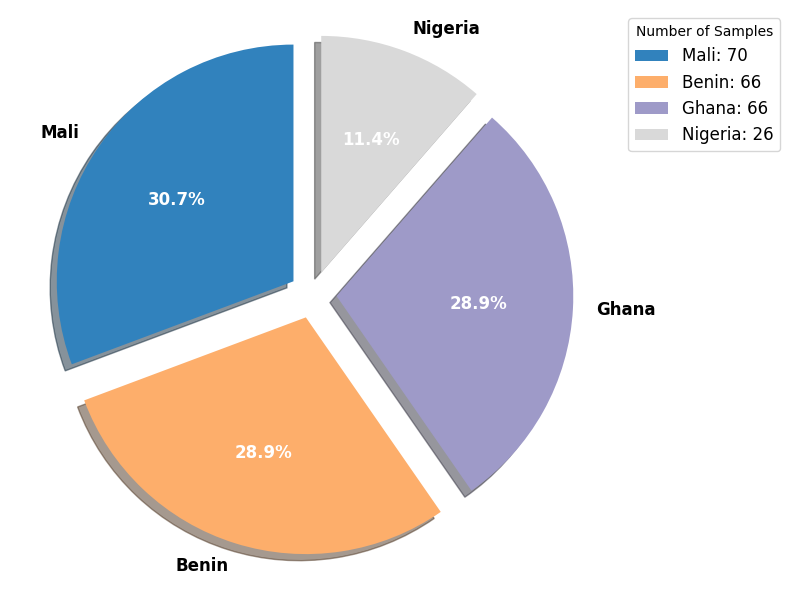

In [22]:
# Create a copy of the DataFrame and count the samples per site
sampe_dis = df.copy()
sample_counts = sampe_dis['country'].value_counts()

# Define colors for the pie chart
colors = plt.cm.tab20c(np.linspace(0, 1, len(sample_counts)))

# Create and style the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sample_counts,
    labels=sample_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True, 
    explode=[0.1] * len(sample_counts)
)

# Format the text elements
plt.setp(texts, size=12, weight='bold')
plt.setp(autotexts, size=12, weight='bold', color='white')

# Add title and legend
#plt.title('Population Distribution Across Sites', fontsize=22, weight='bold', y=1.02)
plt.legend(
    [f'{site}: {count}' for site, count in zip(sample_counts.index, sample_counts)],
    title='Number of Samples',
    loc='upper left',
    bbox_to_anchor=(1, 1), 
    fontsize=12
)

# Save and display the chart
plt.axis('equal')
plt.tight_layout()
plt.savefig('Sample_Distribution_by_Site.png', dpi=300)
plt.show()

**The samples are from four different countries in West Africa: Benin, Ghana, Mali, and Nigeria. The proportion of samples varies by country, with Nigeria representing the smallest percentage at 11.4%, while Mali showcases the largest proportion at 30.7%. This variation highlights the disparities in sample representation across these locations.**

#### <span style="color: red;"> Distribion of sample by gender </span>

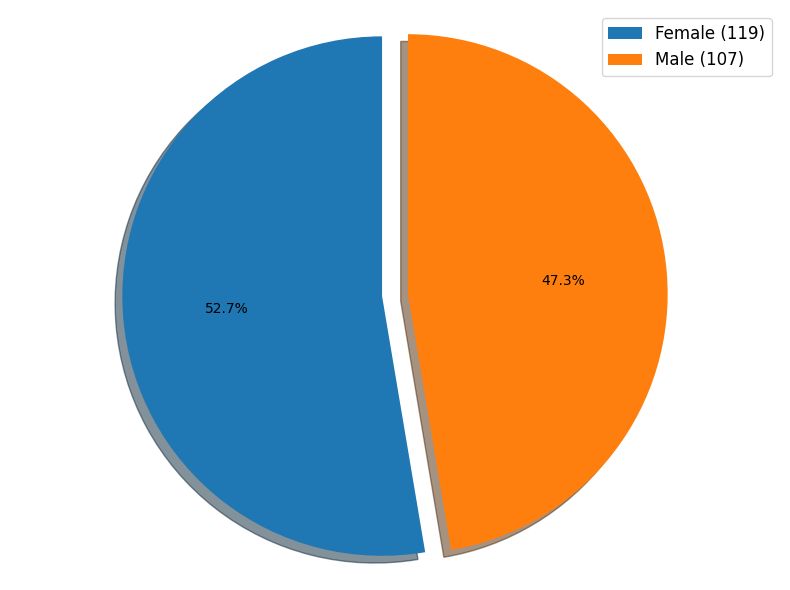

In [23]:
# Count the occurrences and proportions of each gender
gender_counts = df['gender'].value_counts()
proportions = df['gender'].value_counts(normalize=True) * 100

# Define labels and colors for the pie chart
labels = [f'Female ({gender_counts[2]})', f'Male ({gender_counts[1]})']
colors = ['#1f77b4', '#ff7f0e']

# Create and style the pie chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True, explode=(0.1, 0))
#plt.title('Proportions of Gender', fontsize=22, weight='bold', y=1.02)
plt.legend(labels, loc='upper right', fontsize=12)

# Save and display the chart
plt.axis('equal') 
plt.tight_layout()
plt.savefig('Gender_Proportions.png', dpi=300)
plt.show()

**The dataset contains 226 individuals, of which 119 are female, representing 52.7%, while 107 are male, accounting for 47.3%.**

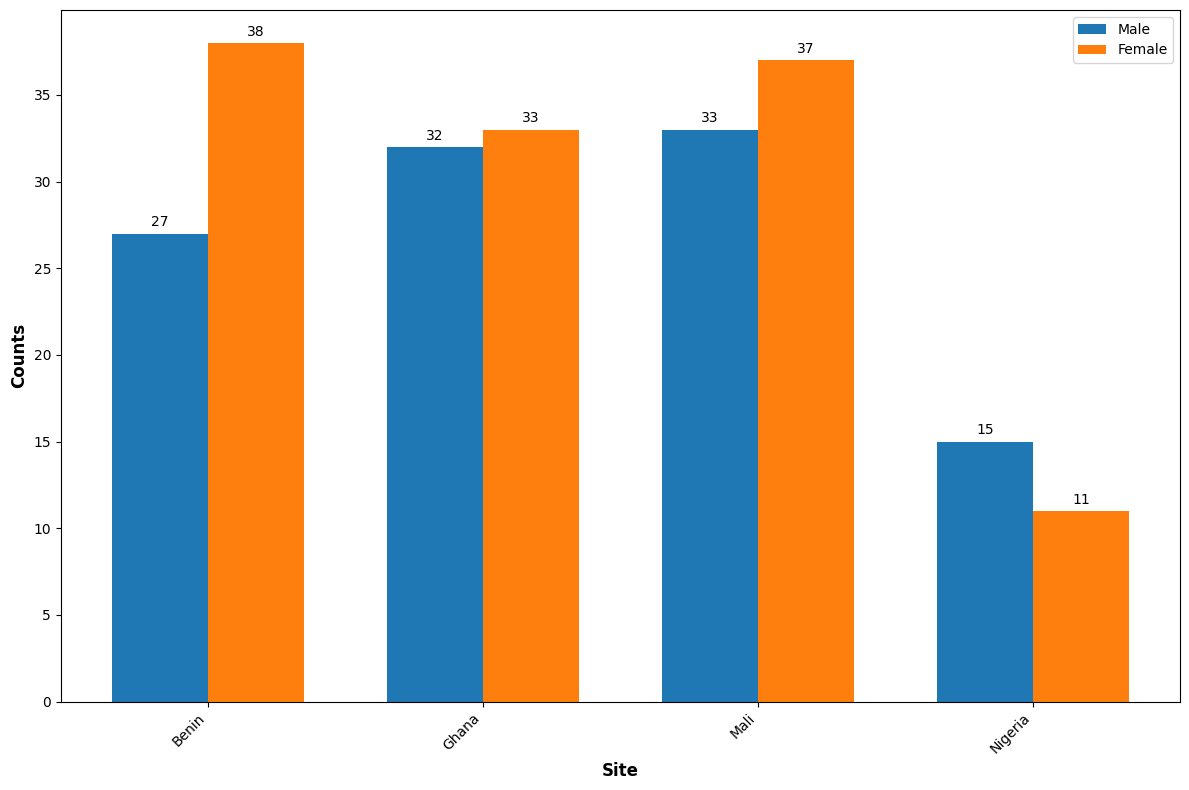

In [24]:
# Create a copy of the DataFrame and map gender codes to labels
df_cop = df.copy()
df_cop['gender'] = df_cop['gender'].map({1: 'Male', 2: 'Female'})

# Group data by 'SITE' and 'GENDER', then reshape to a wide format
gender_counts = df_cop.groupby(['country', 'gender']).size().unstack(fill_value=0)

# Prepare data for the bar chart
labels = gender_counts.index.tolist()  # Site labels
men_means = gender_counts['Male'].values  # Male counts per site
women_means = gender_counts['Female'].values  # Female counts per site
x = np.arange(len(labels))  # X-axis positions
width = 0.35  # Bar width

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bar colors
colors = ['#1f77b4', '#ff7f0e']

# Plot bars for Male and Female counts
rects1 = ax.bar(x - width/2, men_means, width, color=colors[0], label='Male')
rects2 = ax.bar(x + width/2, women_means, width, color=colors[1], label='Female')

# Customize axes and title
ax.set_xlabel('Site', fontsize=12, weight='bold')
ax.set_ylabel('Counts', fontsize=12, weight='bold')
#ax.set_title('Counts of Male and Female by Site', fontsize=22, weight='bold', y=1.02)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Add data labels to bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, color='black')

autolabel(rects1)
autolabel(rects2)

# Finalize layout
fig.tight_layout()
plt.grid(False)  # Disable gridlines
plt.savefig('Counts-of-male-and-female-by-country.png', dpi=300)  # Save the plot
plt.show()  # Display the plot


**In the dataset, the number of females is greater than the number of males for Benin, Ghana and Mali while the number of males is greater than the number of females for Nigeria.**

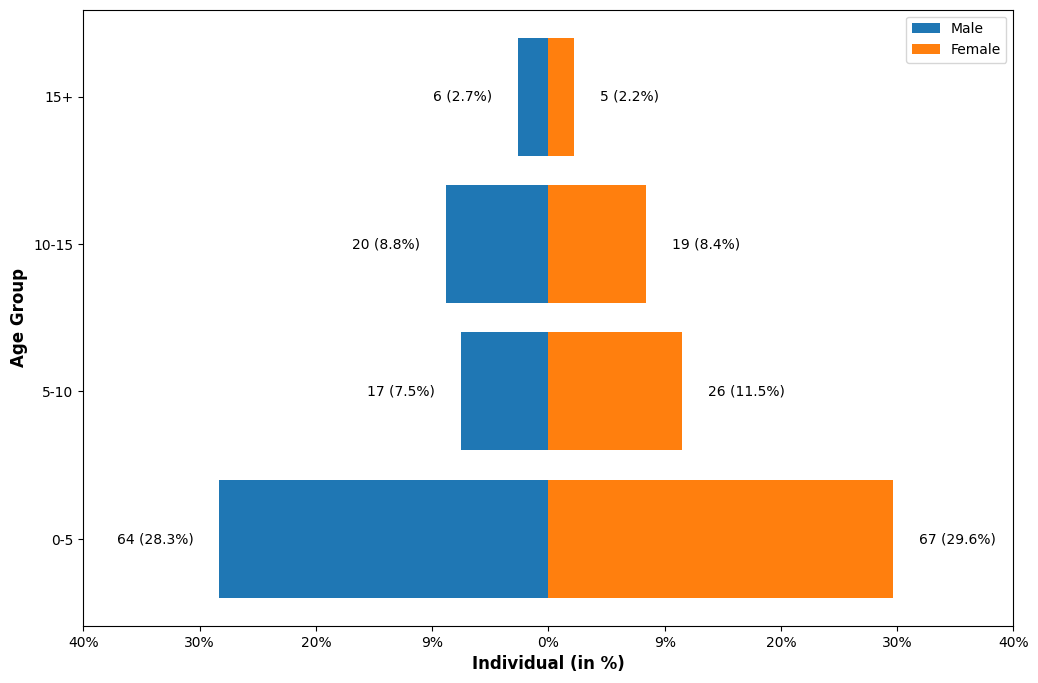

In [36]:
# Define bins and labels
bins = [0, 5, 10, 15, float('inf')]
labels = ['0-5', '5-10', '10-15', '15+']

# Create a copy of the DataFrame and add the AgeGroup column
df_copi = df.copy()
df_copi['AgeGroup'] = pd.cut(df_copi['age'], bins=bins, labels=labels, right=False)
df_copi['gender'] = df_copi['gender'].replace({1: 'Male', 2: 'Female'})

# Group by AgeGroup and Gender with observed parameter
age_gender_distribution = df_copi.groupby(['AgeGroup', 'gender'], observed=False)['gender'].count().unstack().fillna(0)

# Separate male and female counts
male = -age_gender_distribution['Male']
female = age_gender_distribution['Female']

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(age_gender_distribution.index, male, color='#1f77b4', label='Male')
ax.barh(age_gender_distribution.index, female, color='#ff7f0e', label='Female')

# Adding text labels for percentages
total_individuals = 226  # Update this if needed
for i in range(len(labels)):
    ax.text(male.iloc[i] - 5, i, f'{-male.iloc[i]:,.0f} ({(-male.iloc[i] / total_individuals) * 100:.1f}%)', 
            va='center', ha='right', fontsize=10)
    ax.text(female.iloc[i] + 5, i, f'{female.iloc[i]:,.0f} ({(female.iloc[i] / total_individuals) * 100:.1f}%)', 
            va='center', ha='left', fontsize=10)

# Set axis labels and title
ax.set_xlabel('Individual (in %)', fontsize=12, weight='bold')
ax.set_ylabel('Age Group', fontsize=12, weight='bold')
#ax.set_title('Population Pyramid', fontsize=22, weight='bold', y = 1.02)

# Set x-ticks and labels for percentage
max_percentage = 0.4 * total_individuals 
x_ticks = np.linspace(-max_percentage, max_percentage, 9)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'{int(abs(x) / total_individuals * 100)}%' for x in x_ticks])

# Configure x-axis limits and legend
ax.set_xlim(-max_percentage, max_percentage)
ax.grid(False)
ax.legend(loc='upper right')

# Save and show plot
plt.savefig('Individual-Pyramid.png', dpi=300)
plt.show()

**According to the population pyramid, there is a higher concentration of individuals in the younger age groups. It is also noteworthy that the proportion of females is greater than that of males in age groupes 0-5 and 5-10 but the proportion of males is greater than the proportion of females in 10-15 and 15+ group age.**

In [39]:
# Liste des variables cliniques
clinical_vars = [
    'cough', 'productive', 'chest_pain', 'wheeze', 'fever_chills', 'weight_loss_or_no_gain',
    'difficulty_breathing', 'night_sweats', 'side_pain', 'malaise_fatigue', 'loss_appetite',
    'haemoptysis', 'vomiting', 'previous_tb'
]

# Fonction pour calculer les fréquences en pourcentage
def compute_percentage(df, columns):
    summary = pd.DataFrame()
    for col in columns:
        value_counts = df[col].value_counts(dropna=False)
        percentages = (value_counts / len(df)) * 100
        summary[col] = percentages
    return summary.T.fillna(0).rename(columns={0: 'No (0)', 1: 'Yes (1)', 2: "Don't know (2)"})

# Résumé des fréquences
clinical_summary = compute_percentage(df, clinical_vars)
clinical_summary = clinical_summary[['No (0)', 'Yes (1)', "Don't know (2)"]]  # Reorder columns
display(clinical_summary.round(2))


cough,No (0),Yes (1),Don't know (2)
cough,50.44,22.81,25.88
productive,60.53,35.53,3.07
chest_pain,67.98,20.61,10.53
wheeze,89.47,6.58,3.07
fever_chills,23.25,75.00,0.88
weight_loss_or_no_gain,22.81,72.81,3.51
difficulty_breathing,35.96,61.84,0.88
night_sweats,74.12,21.49,3.51
side_pain,79.82,8.33,10.96
malaise_fatigue,38.16,55.26,5.70


In [6]:
df.columns

Index(['patient_id', 'date_particip', 'gender', 'cough', 'productive',
       'chest_pain', 'wheeze', 'fever_chills', 'weight_loss_or_no_gain',
       'difficulty_breathing', 'night_sweats', 'side_pain', 'malaise_fatigue',
       'loss_appetite', 'haemoptysis', 'vomiting', 'previous_tb',
       'date_previous_tb', 'pallor', 'splenomegaly', 'jaundice',
       'hepatomegaly', 'wasting', 'dyspnoea', 'lethargy',
       'abd_distension_mass', 'neck_lymph', 'temperature', 'weight', 'height',
       'middle_upper_arm_cir', 'other_clinical_sign', 'respiratory_rate',
       'subscostal_rec', 'dullness', 'crepitation', 'bronchial_breathing',
       'rhonchi', 'reduced_breath_sounds', 'other_abnorm', 'abnorm_site',
       'cxr_done', 'cxr_date', 'cxr_quality', 'assessment', 'q50_pre_tb',
       'other_x_ray', 'specimen_type', 'spec_date', 'sputum_type',
       'gx_mtb_result', 'gx_rif_resistance', 'mgit_result',
       'other_mycobactera', 'data_when_positive', 'time_when_positive',
       'histo

# Statistic descripte of this part ''Clinical Conditions ''
There are 15 variables : 'cough', 'productive','chest_pain', 'wheeze', 'fever_chills', 'weight_loss_or_no_gain', 'difficulty_breathing', 'night_sweats', 'side_pain', 'malaise_fatigue', 'loss_appetite', 'haemoptysis', 'vomiting', 'previous_tb',. All these variables are categorical variables (0 : No, 1: Yes and 2:Don't know). Propose moi une statique descriptive de ces varibales, sachant que nous avont 226 individus dans notre dataset, je voudrais voir le pourcentage des No, Yes and Don't know pour chauqe varibales dans le daataset . Tu peux faire ca en deux methode (graphique et tableau).

#### <span style="color: red;">West Africa Pre-TB Sample Map</span>


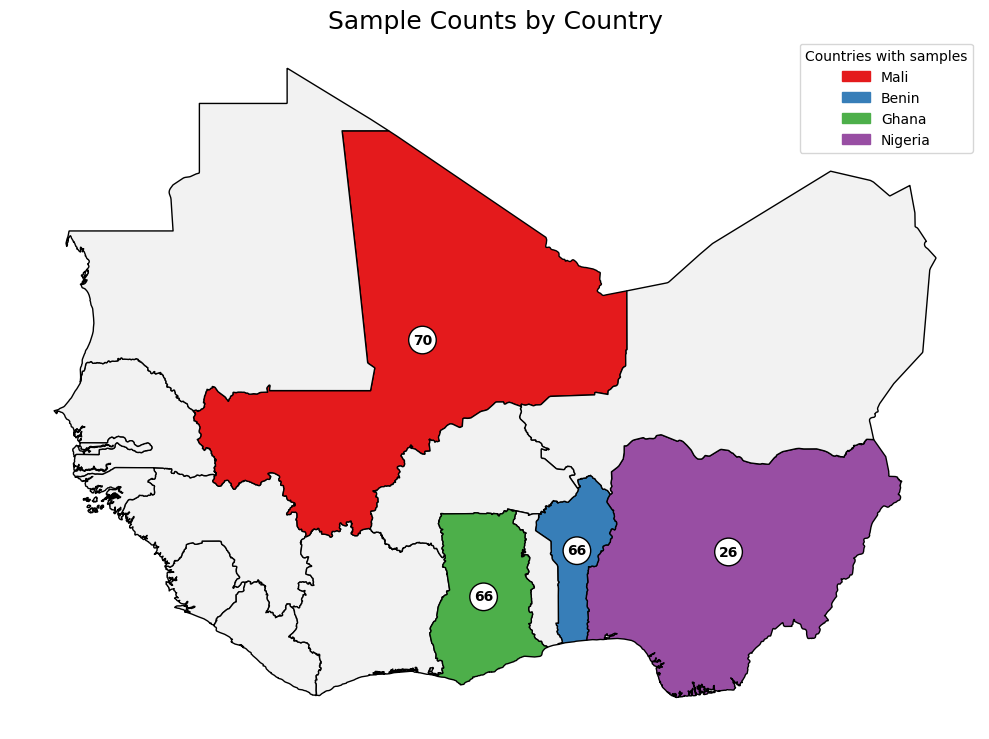

In [25]:
# Load world map
world = gpd.read_file("ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

# West African countries
west_africa = [
    "Benin", "Burkina Faso", "Cape Verde", "Côte d'Ivoire", "Gambia",
    "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Mauritania",
    "Niger", "Nigeria", "Senegal", "Sierra Leone", "Togo"
]
wa_map = world[world["NAME"].isin(west_africa)]

# Sample data
data = {
    "country": ["Mali", "Benin", "Ghana", "Nigeria"],
    "samples": [70, 66, 66, 26]
}
df_samples = pd.DataFrame(data)

# === 4. Merge data ===
wa_map = wa_map.merge(df_samples, how="left", left_on="NAME", right_on="country")

# Assign colors to each country with sample data
color_map = {
    "Mali": "#e41a1c",        
    "Benin": "#377eb8",       
    "Ghana": "#4daf4a",      
    "Nigeria": "#984ea3" 
}

# Color for non-concerned countries
non_concerned_color = "#f2f2f2" 

# Assign color for all countries
wa_map["color"] = wa_map["NAME"].map(color_map).fillna(non_concerned_color)

# === 6. Plot ===
fig, ax = plt.subplots(figsize=(10, 8))

# Plot all countries with their assigned colors
wa_map.plot(ax=ax, color=wa_map["color"], edgecolor='black')

# Add sample numbers with circles for concerned countries
for idx, row in wa_map.dropna(subset=["samples"]).iterrows():
    if row['geometry'].centroid.is_empty:
        continue
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, str(int(row['samples'])), fontsize=10, ha='center', va='center',
            fontweight='bold', color='black',
            bbox=dict(boxstyle="circle,pad=0.3", fc="white", ec="black", lw=1))

# Legend for concerned countries
patches = [mpatches.Patch(color=color, label=country) for country, color in color_map.items()]
plt.legend(handles=patches, title="Countries with samples", loc="upper right")

# Title and layout
ax.set_title("Sample Counts by Country", fontsize=18)
ax.axis("off")
plt.tight_layout()

plt.show()

In [11]:
!cd c:\Users\asani\Desktop\Consultancy Data Analysis\TUB0008\hdwr_child_tb; dir

The system cannot find the path specified.


In [12]:
!python -m pip install src

  Using cached src-0.0.7.zip (6.3 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build src


  error: subprocess-exited-with-error
  
  × Building wheel for src (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [86 lines of output]
      C:\Users\asani\AppData\Local\Temp\pip-build-env-c2np78qo\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      running bdist_wheel
      running build
      running build_py
      creating build\lib\src
      copying src\__init__.py -> build\lib\src
      running egg_info
      writing src.egg-info\PKG-INFO
      writing dependency_links to src.egg-info\dependency_links.txt
      writing requirements to src.egg-info\requires.txt
      writing top-level names to src.egg-info\top_level.txt
      reading manifest file 'src.egg-info\SOURCES.txt'
      reading manifest template 'MANIFEST.in'
      adding license file 'LICENSE.rst'
      writing manifest file 'src.egg-info\SOURCES.txt'
      Traceback (most recent call last):
        Fil

In [7]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 8259-C634

 Directory of c:\Users\asani\Desktop\HDWR\Tuberculosis

14/05/2025  11:00    <DIR>          .
13/05/2025  15:39    <DIR>          ..
30/04/2025  22:42            55,234 childhood_tb_dataset.csv
30/04/2025  22:42             9,239 childhood_tb_data_dictionary.csv
14/05/2025  09:20            63,722 cleaned_tb_dataset.csv
14/05/2025  10:56            99,186 Counts-of-male-and-female-by-country.png
14/05/2025  09:30            37,795 data_cleaning.ipynb
14/05/2025  16:21           505,653 data_exploration.ipynb
09/05/2025  11:09           306,117 descriptive_statistique.ipynb
14/05/2025  09:20             3,285 dict.csv
14/05/2025  10:56           141,221 Gender_Proportions.png
14/05/2025  11:08           119,752 Individual-Pyramid.png
16/01/2025  22:49            49,204 mrc.png
14/05/2025  09:48    <DIR>          ne_10m_admin_0_countries
09/05/2025  12:34         8,806,224 ne_10m_admin_0_countries.shp
14/05/2025  10:55         